# Steps:
1. Reading, understanding and visualizing the data
2. Preparing the model - Train-Test Set
3. Training the Model
4. Residula analysis
5. Predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Used to ignore the warnings
warnings.filterwarnings('ignore')

In [61]:
#read the data
housing = pd.read_csv('Housing.csv')

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.shape

(545, 13)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [7]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


# Step1 Data Visualization

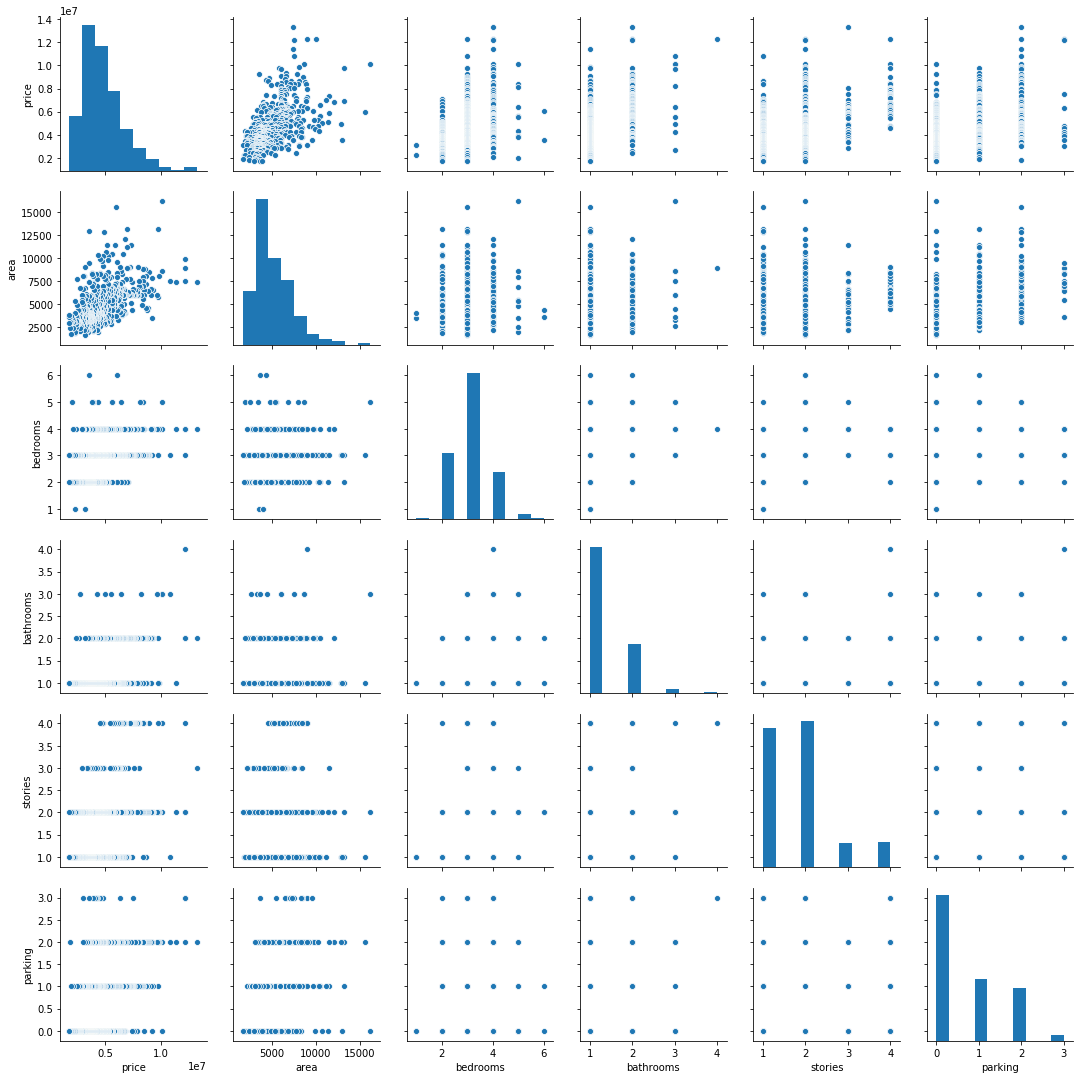

In [13]:
# Visulaization the numerical variables
sns.pairplot(housing)

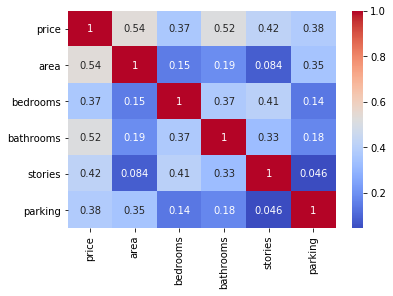

In [10]:
sns.heatmap(housing.corr(),annot=True,cmap='coolwarm')

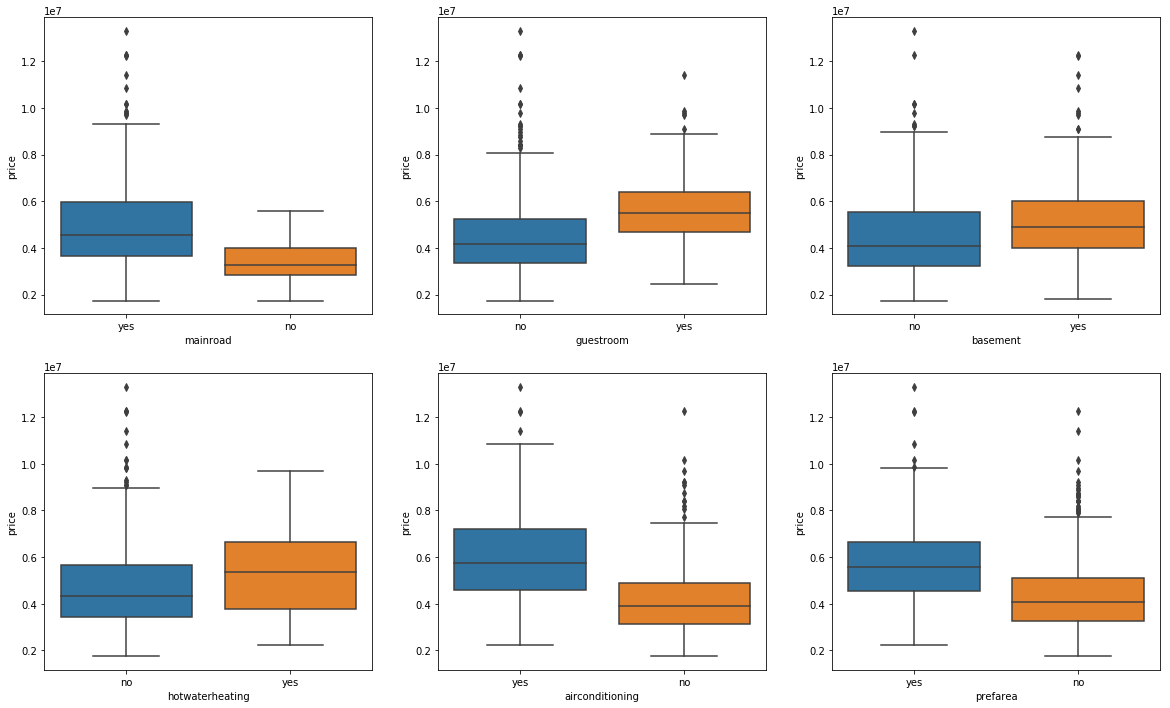

In [19]:
#Visualizing Categorical Values against continuous variable
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot(y = 'price',x='mainroad', data=housing)

plt.subplot(2,3,2)
sns.boxplot(y = 'price',x='guestroom', data=housing)

plt.subplot(2,3,3)
sns.boxplot(y = 'price',x='basement', data=housing)

plt.subplot(2,3,4)
sns.boxplot(y = 'price',x='hotwaterheating', data=housing)

plt.subplot(2,3,5)
sns.boxplot(y = 'price',x='airconditioning', data=housing)

plt.subplot(2,3,6)
sns.boxplot(y = 'price',x='prefarea', data=housing)

plt.show()

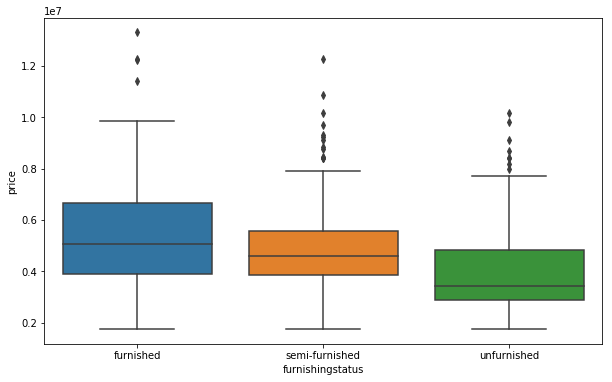

In [20]:
plt.figure(figsize=(10,6))

sns.boxplot(y = 'price',x='furnishingstatus', data=housing)

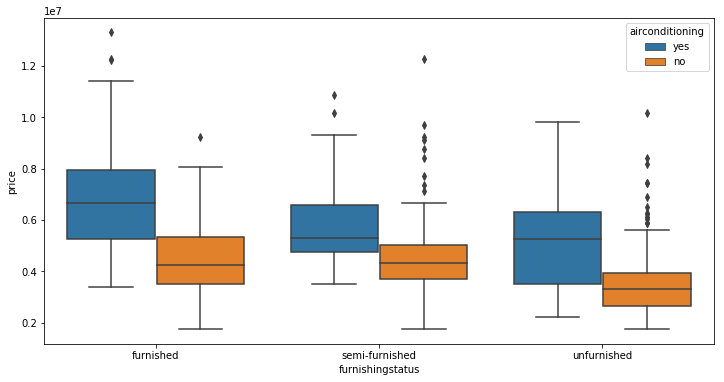

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'price',x='furnishingstatus', hue='airconditioning', data=housing)

# Step 2 - Data Preparation
- Encoding 
    - Converting binary variables Yes/No to 1/0
    - Dealing with other Categorical Variables - using get dummies or onehot encoding
- Splitting of train and test set
- Scaling of new variables

In [34]:
# yes/no variables
#housing['mainroad','guestroom','basement','hotwaterheating','airconditioning'].value_counts()
#Error when more than one vaaibel selected
##KeyError: ('mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning')

housing['mainroad'].value_counts()
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [64]:
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes':1,'no':0})) #Map takes an dictionary can update the data

#If you use map for a single column then 'AttributeError: 'str' object has no attribute 'map''

In [65]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [69]:
name = ['Reetesh', 'Shruti', 'Kaustubh', 'Vikas', 'Mahima', 'Akshay']
# Storing the responses in a variable 'repsonse'
response = ['No', 'Maybe', 'yes', 'Yes', 'maybe', 'Yes']

# Importing pandas and converting the read lists to a dataframe. You can print
# the dataframe and run the code to see what it will look like
import pandas as pd 
df = pd.DataFrame({'Name': name,'Response': response})

# Write your code here
df['Response'] = df['Response'].apply(lambda x: x.upper())
df['Response'] = df['Response'].map({'YES':'1.0','NO':'0.0','MAYBE':'0.5'}) # For single column update
# Print the final DataFrame
print(df)

       Name Response
0   Reetesh      0.0
1    Shruti      0.5
2  Kaustubh      1.0
3     Vikas      1.0
4    Mahima      0.5
5    Akshay      1.0


## Dummy variables for Furnishing status

In [71]:
# 3 status so 2 new columns will be created
status = pd.get_dummies(housing['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [73]:
# How to handle for k levels k-1 columns 
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
status.head()
# 0 0 > Furnisheed
# 0 1 > unfurnished
# 1 0 > semi-furnished

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [74]:
#concat the dataframes
housing = pd.concat([housing,status],axis=1)
housing = housing.drop(['furnishingstatus'],axis=1)

In [79]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Train Test Split 
- Split the dataset to Train and Test

In [147]:
#Train Test Split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

#X_train,X_test,y_train,y_test = train_test_split()
df_train, df_test = train_test_split(housing, train_size=0.7,test_size=0.3, random_state=100)

In [148]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


## Data Preprocessing - Standardisation of the data

- Min-Max scaling (Min 0, max 1) = scaling the values between 0 and 1
- Standardisation (mean-0, sigma-1)

In [149]:
from sklearn.preprocessing import MinMaxScaler

#Initialization
scaler = MinMaxScaler()

In [150]:
#Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']


#Fit and Transform the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


#fit() - 

#transform() - 

#fit_transform() - 

In [151]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [152]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,381.0,0.260333,0.157607,0.0,0.151515,0.221212,0.345455,1.0
area,381.0,0.288710,0.181420,0.0,0.155227,0.234424,0.398099,1.0
bedrooms,381.0,0.386352,0.147336,0.0,0.200000,0.400000,0.400000,1.0
bathrooms,381.0,0.136483,0.237325,0.0,0.000000,0.000000,0.500000,1.0
stories,381.0,0.268591,0.295001,0.0,0.000000,0.333333,0.333333,1.0
mainroad,381.0,0.855643,0.351913,0.0,1.000000,1.000000,1.000000,1.0
guestroom,381.0,0.170604,0.376657,0.0,0.000000,0.000000,0.000000,1.0
basement,381.0,0.351706,0.478131,0.0,0.000000,0.000000,1.000000,1.0
hotwaterheating,381.0,0.052493,0.223313,0.0,0.000000,0.000000,0.000000,1.0
airconditioning,381.0,0.299213,0.458515,0.0,0.000000,0.000000,1.000000,1.0


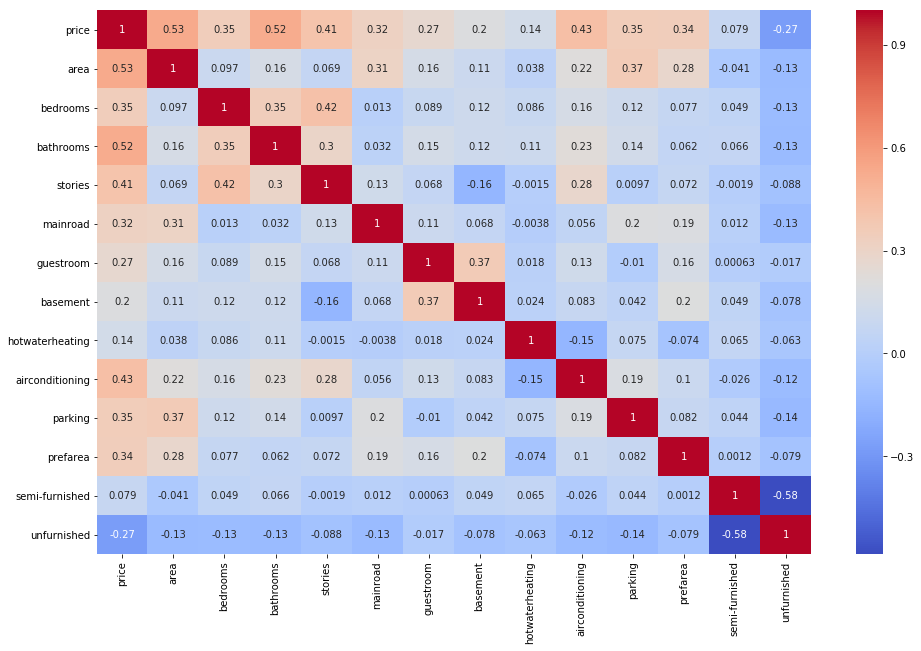

In [153]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="coolwarm")
plt.show()

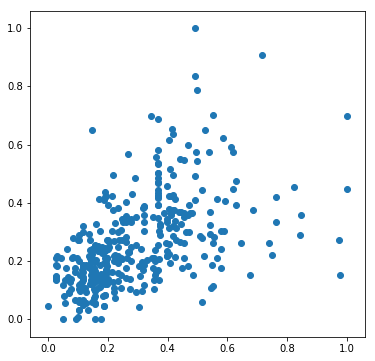

In [154]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.area, df_train.price)
plt.show()

In [155]:
y_train = df_train.pop('price')
X_train = df_train

In [156]:
import statsmodels
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[['area']])

model = sm.OLS(y_train,X_train_sm).fit()

In [157]:
model.params

const    0.126894
area     0.462192
dtype: float64

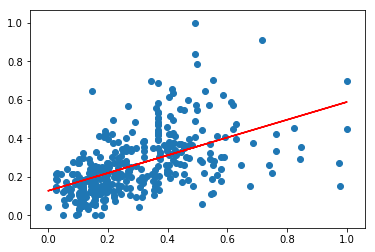

In [158]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.127 + 0.462*X_train_sm.iloc[:, 1], 'r')
plt.show()

In [159]:
# Print a summary of the linear regression model obtained
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           3.15e-29
Time:                        12:12:40   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

### Adding another variable

The R-squared value obtained is `0.283`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `bathrooms`.

In [160]:
# Assign all the feature variables to
X_train_lm = X_train[['area', 'bathrooms']]

# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [161]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           2.51e-54
Time:                        12:12:51   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

In [162]:
#The R2 has increased to .48 from .28


# Assign another feature variables to X
X_train_lm = X_train[['area', 'bathrooms','bedrooms']]

# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.params)

print('\n')

print(lr.summary())


const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           3.12e-57
Time:                        12:12:55   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [163]:
# Assign all the feature variables to X

# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.params)

print('\n')

print(lr.summary())

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           8.83e-83
Time:                        12:12:56   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367 

- Looking at the p-values, some variables are no significant in presence of other variables. such as Benrooms and Semi-furnished and basement.

- Let's check the Variation Inflation Factor and decide which of the variables we could drop and fit the model again.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [165]:
vif = pd.DataFrame()

In [166]:
vif['Features'] = X_train.columns

In [167]:
vif

,Features
0,area
1,bedrooms
2,bathrooms
3,stories
4,mainroad
5,guestroom
6,basement
7,hotwaterheating
8,airconditioning
9,parking


In [168]:
vif['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['vif'] = round(vif['vif'],2)

vif

,Features,vif
0,area,4.67
1,bedrooms,7.33
2,bathrooms,1.67
3,stories,2.70
4,mainroad,6.02
5,guestroom,1.47
6,basement,2.02
7,hotwaterheating,1.14
8,airconditioning,1.77
9,parking,2.12


### from the VIF and P-value analysis we can drop the following columns:

- Drop semi-furnished as it has a very high p-value of 0.938.

In [169]:
X = X_train.drop('semi-furnished',axis=1,)

X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,1


In [172]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm).fit()

print(lr.params)
print(lr.summary())

VIF = pd.DataFrame()
VIF['Features'] = X.columns

VIF['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['vif'] = round(VIF['vif'],2)

VIF

const              0.020740
area               0.234404
bedrooms           0.046710
bathrooms          0.190876
stories            0.108475
mainroad           0.050401
guestroom          0.030447
basement           0.021605
hotwaterheating    0.084890
airconditioning    0.066803
parking            0.060761
prefarea           0.059419
unfurnished       -0.031594
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           1.07e-83
Time:                        12:21:09   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                        

,Features,vif
0,area,4.67
1,bedrooms,6.59
2,bathrooms,1.67
3,stories,2.69
4,mainroad,5.68
5,guestroom,1.47
6,basement,2.01
7,hotwaterheating,1.14
8,airconditioning,1.77
9,parking,2.12


In [174]:
# Now drop  Bedrooms as it has VIF more than 5%
X.drop('bedrooms',1,inplace = True)

import statsmodels.api as sm
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm).fit()

print(lr.params)
print(lr.summary())

VIF = pd.DataFrame()
VIF['Features'] = X.columns

VIF['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['vif'] = round(VIF['vif'],2)
VIF

const              0.035722
area               0.234746
bathrooms          0.196480
stories            0.117751
mainroad           0.048798
guestroom          0.030097
basement           0.023917
hotwaterheating    0.086403
airconditioning    0.066533
parking            0.062872
prefarea           0.059643
unfurnished       -0.032317
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           2.73e-84
Time:                        12:23:26   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:        

,Features,vif
0,area,4.55
1,bathrooms,1.61
2,stories,2.23
3,mainroad,4.79
4,guestroom,1.46
5,basement,1.87
6,hotwaterheating,1.12
7,airconditioning,1.76
8,parking,2.10
9,prefarea,1.50


In [175]:
VIF = VIF.sort_values(by = "vif", ascending = False)


In [176]:
VIF

,Features,vif
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


In [177]:
#Now drop basement as it is having high p-value

X.drop('basement',1,inplace = True)

import statsmodels.api as sm
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm).fit()

print(lr.params)
print(lr.summary())

VIF = pd.DataFrame()
VIF['Features'] = X.columns

VIF['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['vif'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(['VIF'],ascending=True)

VIF

const              0.042792
area               0.233517
bathrooms          0.201857
stories            0.108139
mainroad           0.049672
guestroom          0.040198
hotwaterheating    0.087618
airconditioning    0.068221
parking            0.062854
prefarea           0.063745
unfurnished       -0.033699
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           3.13e-84
Time:                        12:28:14   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10        

,Features,VIF,vif
5,hotwaterheating,1.122413,1.12
4,guestroom,1.301517,1.30
9,unfurnished,1.331121,1.33
8,prefarea,1.470549,1.47
1,bathrooms,1.582378,1.58
6,airconditioning,1.751348,1.75
7,parking,2.102863,2.10
2,stories,2.123314,2.12
0,area,4.540186,4.54
3,mainroad,4.550743,4.55


## Step 7: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

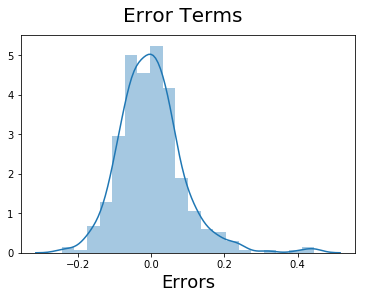

In [179]:
y_train_price = lr.predict(X_train_sm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Let's Predict

In [180]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [181]:
y_test = df_test.pop('price')
X_test = df_test

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)

# Making predictions using the fourth model

y_pred_m4 = lr.predict(X_test_m4)

In [182]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

m2 = mean_squared_error(y_true=y_test, y_pred=y_pred_m4)
print('Test MSE:',m2)

m2 = mean_squared_error(y_true=y_train, y_pred=y_train_price)
print('Train MSE:',m2)

Test MSE: 0.01000218479293564
Train MSE: 0.008027987118101538


In [183]:
r2 = r2_score(y_true=y_train, y_pred=y_train_price)
print('Train R-Square:',r2)

r2 = r2_score(y_true=y_test, y_pred=y_pred_m4)
print('Test R-Square:',r2)

Train R-Square: 0.6759630668130595
Test R-Square: 0.660134403021964
